# CSCA 5622 Final Project - Consumer PC Hardware Trends and Predictions
### By Moshiur Howlader

## Introduction

In the digital age, computer hardware is ubiquitous, and its performance continues to improve year by year. Intel's co-founder provided valuable insight into how computers would evolve, known as **Moore's Law** ([see Wikipedia](https://en.wikipedia.org/wiki/Moore%27s_law)). This observation states that the number of transistors in an integrated circuit (IC) doubles approximately every two years. The chart below illustrates the trend from 1970 to 2020:

<br><br>
<img src="../images/moores_law_transistor_count_1970_2020.png" alt="Transistor count over time" width="1200" height="800">

Based on Moore's Law, consumers might expect to get computer hardware with double the transistors every two years—leading to predictable and consistent increases in computing power. However, the reality is far more complex. As the number of transistors crammed into a fixed area increases, **quantum physics** begins to interfere, imposing physical limitations. These constraints prevent engineers from continuing to follow Moore's Law indefinitely. According to [nano.gov](https://www.nano.gov/nanotech-101/what/nano-size), the average size of a gold atom is 1/3 nm! Clearly, there is a limit to how many transistors can be packed into computer parts. Below are the trends in chip lithography size according to Wikipedia:

| Feature Size | Year |
|--------------|------|
| 20 μm        | 1968 |
| 10 μm        | 1971 |
| 6 μm         | 1974 |
| 3 μm         | 1977 |
| 1.5 μm       | 1981 |
| 1 μm         | 1984 |
| 800 nm       | 1987 |
| 600 nm       | 1990 |
| 350 nm       | 1993 |
| 250 nm       | 1996 |
| 180 nm       | 1999 |
| 130 nm       | 2001 |
| 90 nm        | 2003 |
| 65 nm        | 2005 |
| 45 nm        | 2007 |
| 32 nm        | 2009 |
| 28 nm        | 2010 |
| 22 nm        | 2012 |
| 14 nm        | 2014 |
| 10 nm        | 2016 |
| 7 nm         | 2018 |
| 5 nm         | 2020 |
| 3 nm         | 2022 |
| 2 nm         | ~2025 (Future) |

According to Jensen Huang, the CEO of Nvidia, **Moore's Law is dead** ([TechSpot article](https://www.techspot.com/news/96094-nvidia-jensen-huang-once-again-claims-moore-law.html)). This statement seems reasonable given the physical limitations of current chip designs. As the rate of improvement in transistor count decreases year over year, will consumers start paying more for diminishing performance gains?

## Why Should Consumers Care About the Death of Moore's Law?

With the decline of Moore's Law, we can expect fewer improvements in transistor density in upcoming generations. This poses a concern for consumers, as we may start paying more for diminishing returns on performance. As traditional computing approaches its physical limits, incremental improvements will become smaller, potentially benefiting corporations more than consumers. This could lead to a scenario where consumers pay more for fewer benefits, which is undesirable.

## The Economic Reality Today

Inflation has steadily eroded purchasing power in the USA over the last 50 years. As inflation rises, the real cost of consumer goods, including technology, increases, affecting affordability. Here are links to inflation-related data:

<div style="text-align: cente
    <h3>America's Growing Rent Over the Years</h3>r;">
    <img src="../images/cost_of_living.png" alt="Cost of Living" style="width:800px;"/>
    <br>
    <em>Source: <a href="https://www.axios.com/2023/05/22/americas-growing-rent-burden" target="_blank">Axios: America's Growing Rent Burden</a></em>
</div>

<div style="text-align:
    <h3>Purchasing Power of the U.S. Dollar Over Time</h3> center;">
    <img src="../images/us_dollar_purchasing_power.jpg" alt="US Dollar Purchasing Power" style="width:1000px;"/>
    <br>
    <em>Source: <a href="https://elements.visualcapitalist.com/purchasing-power-of-the-u-s-dollar-over-time/" target="_blank">Visual Capitalist: Purchasing Power of the U.S. Dollar Over Time</a></em>
</div>

<br><br>

## Purpose of This Project

This project aims to answer the following key questions:

1. What are the trends in CPU and GPU parts over the past 20 years?
2. Is the price-to-performance ratio of these parts keeping up? Are consumers getting a fair deal compared to 10 to 20 years ago?
3. Can we predict the performance of next-gen, unreleased CPU and GPU parts using supervised machine learning models?
models?


## Data Collection & Description

The data for both CPU/GPU was collected from via web scraping:
https://www.techpowerup.com/


Note that various other sources were considered but was extremely lacklustre in the quality of the data or additionally difficult to scrape/obtain. Hence they were skipped for the purposes of using as this project's data source.
- https://www.hwcompare.com/
- https://www.userbenchmark.com/Software
- https://www.tomshardware.com/reviews/gpu-hierarchy,4388.html
- https://www.tomshardware.com/reviews/cpu-hierarchy,4312.html

To view some of these sample data, it is located under `./data/research_data`



<p>I have included diagrams illustrating the web scraping methodology used to collect a comprehensive dataset from 
<a href="https://www.techpowerup.com/" target="_blank">TechPowerUp</a> below:</p>

<h2 style="text-align: center;">Data Scraping Methodology</h2>

<br>

<div style="text-align: center;">
    <h3>Data Scraping Workflow - CPU Filtering</h3>
    <img src="../images/data_scraping_workflow-cpu-filtering.png" alt="Data Scraping Workflow - CPU Filtering" style="width: 800px;"/>
</div>

<br><br>

<div style="text-align: center;">
    <h3>Data Scraping Workflow - GPU Filtering</h3>
    <img src="../images/data_scraping_workflow-gpu-filtering.png" alt="Data Scraping Workflow - GPU Filtering" style="width: 800px;"/>
</div>

<br>

<p style="text-align: center;">Please note that for GPU data collection, filtering was applied by brand (AMD, Intel, Nvidia) only.</p>

<br><br>

<div style="text-align: center;">
    <h3>Data Scraping Full Workflow</h3>
    <img src="../images/data_scraping_full_workflow.png" alt="Data Scraping Full Workflow" style="width: 800px;"/>
<!-- </div>

<br><b -->r>


<br><br>
) only.</p>
>
v>


Please note that the website rate limits how much data you can scrape in a day. Hence the use of VPN to change the public IP address was required (to download over 5000 HTML files in a few days).

After completing the pipeline above, we are provided with an invaluable dataset containing 21 years (2004 to 2024) of CPU and GPU data. They are generally standard CPU and GPU specification related data as well as its release date and other data consumers are generally interested about.

In [93]:
import pandas as pd

# Set display options to show all columns
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Disable column wrapping

# Relative paths to the CSV files
cpu_data_path = '../src/cpu_data_original.csv'
gpu_data_path = '../src/gpu_data_original.csv'

# Load the data
cpu_data = pd.read_csv(cpu_data_path)
gpu_data = pd.read_csv(gpu_data_path)

# Display the headers and first few rows for CPU data
print("CPU Data - Header and First 5 Rows:")
display(cpu_data.head())

# Display the headers and first few rows for GPU data
print("\nGPU Data - Header and First 5 Rows:")
display(gpu_data.head())


CPU Data - Header and First 5 Rows:


,Name,Physical - Socket:,Physical - Foundry:,Physical - Process Size:,Physical - Transistors:,Physical - Die Size:,Physical - Package:,Physical - tCaseMax:,Processor - Market:,Processor - Production Status:,Processor - Release Date:,Processor - Part#:,Processor - Bundled Cooler:,Performance - Frequency:,Performance - Turbo Clock:,Performance - Base Clock:,Performance - Multiplier:,Performance - Multiplier Unlocked:,Performance - Voltage:,Performance - TDP:,Performance - FP32:,Performance - INT32:,Architecture - Codename:,Architecture - Generation:,Architecture - Memory Support:,Architecture - DRAM Type:,Architecture - GDDR6 Capacity:,Architecture - Rated Speed:,Architecture - Memory Bus:,Architecture - ECC Memory:,Architecture - PCI-Express:,Architecture - Chipset:,Core Config - # of Cores:,Core Config - # of Threads:,Core Config - SMP # CPUs:,Core Config - Integrated Graphics:,Cache - Cache L1:,Cache - Cache L2:,Cache - Cache L3:,Architecture - Chipsets:,Processor - Launch Price:,Physical - tJMax:,Core Config - Core Pipeline:,Performance - Configurable TDP:,Performance - HyperTransport:,Architecture - LPDDR5 Speed:,Processor - Package#:,Processor - Stepping Codes:,Architecture - DDR4 Speed:,Architecture - Maximum Memory:,Performance - Configurable TDP-down:,Architecture - DDR3L Speed:,Architecture - LPDDR3 Speed:,Architecture - DMI Bus Speed:,Performance - TDP-Down Freq.:,Performance - E-Core Frequency:,Performance - PL1:,Performance - PL2:,Architecture - LPDDR4x Speed:,Core Config - Hybrid Cores:,Cache - E-Core L1:,Cache - E-Core L2:,Architecture - DDR5 Speed:,Performance - Uncore Frequency:,Performance - TDP-down Frequency:,Architecture - Northbridge Location:,Performance - Max Power:,Performance - Minimum Power:,Architecture - PCH PCIe:,Performance - TDP-Down Frequency:,Architecture - LPDDR4 Speed:,Processor - MSRP:,Performance - TDP Range:,Performance - All-Core Turbo:,Performance - PL2 Tau Limit:,Architecture - Secondary PCIe:,Performance - Processor Base Power:,Performance - Min. Assured Freq.:,Performance - Max. Assured Freq.:,Performance - Maximum Power:,Performance - TDP-Up Freq.:,Physical - Base Die Process:,Physical - Base Die Transistors:,Physical - Base Die Size:,Performance - All Core Turbo:,Performance - Bus Speed:,Architecture - Packaged Memory:,Architecture - Memory Capacity:,Performance - TDP-up Frequency:,Performance - Configurable TDP-up:,Performance - All P-Core Turbo:,Performance - P-Core Boost 3.0:,Processor - Retail Launch:,Performance - Max Multi Adjust:,Physical - eDRAM Process Size:,Physical - eDRAM Die Size:,Cache - Cache L4:,Performance - All Core Frequency:,Performance - Boost 3.0:,Performance - P-Core Turbo:,Physical - IMC Process Size:,Physical - IMC Die Size:,Physical - IMC Transistor Count:,Performance - Boost 2.0:,Physical - Radeon Graphics Die Size:,Core Config - Dedicated Graphics:,Performance - Boost 3.0 Frequency:,Architecture - DMI3:,Physical - SoC Tile Process:,Physical - I/O Tile Process:,Physical - Graphics Tile Process:,Performance - LP E-Core Frequency:,Performance - AI Boost NPU:,Core Config - LP E-Cores:,Performance - LP E-Core Boost:,Architecture - LPDDR5x Speed:,Architecture - Tertiary PCIe:,Performance - AI Boost NPU 4:,Cache - Cache L0-D:,"Performance - PL2 ""Extreme"":",Physical - I/O Process Size:,Physical - I/O Die Size:,Performance - PPT:,Cache - 3D V-Cache:,Core Config - # of CCDs:,Core Config - Cores per CCD:,Physical - I/O Transistors:,Performance - NorthBridge-IMC Clock:,Processor - OEM Launch MSRP:,Processor - Retail Launch MSRP:,Performance - Minimum Clock:,Performance - Minimum Voltage:,Architecture - HyperTransport Links:,Architecture - HyperTransport Clock:,Core Config - FPU Pipeline:,Performance - ACP:,Performance - HT Link:,Performance - HT Links:,Performance - NB/IMC Clock:,Performance - NB Frequency:,Architecture - Configurable TDP:,Performance - Effective FSB:,Cache - Trace L1:,Cache - L1 Trace:,Performance - TDP-down:,Performance - XFR:,Performance - P-Core


GPU Data - Header and First 5 Rows:


,GPU Name,GPU Variant,Architecture,Foundry,Process Size,Transistors,Density,Die Size,Chip Package,Release Date,Availability,Generation,Predecessor,Successor,Production,Bus Interface,Base Clock,Boost Clock,Memory Clock,Memory Size,Memory Type,Memory Bus,Bandwidth,Shading Units,TMUs,ROPs,SM Count,Tensor Cores,RT Cores,L1 Cache,L2 Cache,Pixel Rate,Texture Rate,FP16 (half),FP32 (float),FP64 (double),Slot Width,Length,Width,TDP,Suggested PSU,Outputs,Power Connectors,Board Number,DirectX,OpenGL,OpenCL,Vulkan,CUDA,Shader Model,NVENC,NVDEC,Name,BF16,TF32,FP64 Tensor,Compute Units,Height,Weight,Released,Compute,Shader ISA,VCN,SDMA,MP0,FP16 Units,FP64 Units,Max. TDP,Desktop Variant,WDDM,DCE,UVD,VCE,CLRX,Z-Stencil,ACEs,GEs,Mobile Variant,MCD Process,Process Type,GCD Transistors,MCD Transistors,GCD Density,MCD Density,GCD Die Size,MCD Die Size,Package,GC,MP1,HWSs,DMAs,SEs,Codename,Package Size,DCN,Mobile Variant 2,SDNA,I/O Process,CCD Die Size,I/O Die Size,L0 Cache,Chip Variant,DMU,MP0 / MP1,L3 Cache,Shader Engines,GCD Size,MCD Size,Pixel Shaders,Vertex Shaders,Vertex Cache,Texture Cache,Tex L1 Cache,Execution Units,Reviews,S-Spec,Launch Price,GPU Clock,Shader Clock,Vertex Rate,SMX Count,SMM Count,Pixel Shader,Vertex Shader,Current Price,Subslices,Slices,Subslice,PureVideo HD,VDPAU,INT32 Units,SFUs,TPCs,GPCs,Register File,Tex L2 Cache,INT4 Units,INT8 Units,DirectML,Raytracing,VPS,Mesh Shaders,DPUs,PPC,Storage,Part Number,SOC Clock,UVD Clock,BIOS Number,MCM,Game Clock,Peak Clock,Base Storage,Inputs
0,GA102,GA102-890-A1,Ampere,Samsung,8 nm,"28,300 million",45.1M / mm²,628 mm²,BGA-3328,"Apr 12th, 2021",2021,Tesla Ampere(Axx),Tesla Turing,Tesla Ada,Active,PCIe 4.0 x16,885 MHz,1695 MHz,1563 MHz12.5 Gbps effective,24 GB,GDDR6,384 bit,600.2 GB/s,9216,288,96,72.0,288.0,72.0,128 KB (per SM),6 MB,162.7 GPixel/s,488.2 GTexel/s,31.24 TFLOPS(1:1),31.24 TFLOPS,976.3 GFLOPS(1:32),Single-slot,267 mm10.5 inches,111 mm4.4 inches,150 W,450 W,No outputs,1x 8-pin,PG133 SKU 215,12 Ultimate(12_2),4.6,3.0,1.3,8.6,6.8,1x 7th Gen,2x 5th Gen,NVIDIA A10 PCIe Specs | TechPowerUp GPU Database,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,GA100,NaN,Ampere,TSMC,7 nm,"54,200 million",65.6M / mm²,826 mm²,BGA-2743,"Jun 22nd, 2020",NaN,Tesla Ampere(Axx),Tesla Turing,Tesla Ada,Active,PCIe 4.0 x16,765 MHz,1410 MHz,1215 MHz2.4 Gbps effective,40 GB,HBM2e,5120 bit,1.56 TB/s,6912,432,160,108.0,432.0,NaN,192 KB (per SM),40 MB,225.6 GPixel/s,609.1 GTexel/s,77.97 TFLOPS(4:1),19.49 TFLOPS,9.746 TFLOPS(1:2),Dual-slot,267 mm10.5 inches,111 mm4.4 inches,250 W,600 W,No outputs,8-pin EPS,P1001 SKU 200,NaN,NaN,3.0,NaN,8.0,NaN,NaN,NaN,NVIDIA A100 PCIe 40 GB Specs | TechPowerUp GPU...,311.84 TFLOPS (16:1),155.92 TFLOPs (8:1),19.49 TFLOPS (1:1),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GA100,NaN,Ampere,TSMC,7 nm,"54,200 million",65.6M / mm²,826 mm²,BGA-2743,"Jun 28th, 2021",NaN,Tesla Ampere(Axx),Tesla Turing,Tesla Ada,Active,PCIe 4.0 x16,1065 MHz,1410 MHz,1512 MHz3 Gbps effective,80 GB,HBM2e,5120 bit,1.94 TB/s,6912,432,160,108.0,432.0,NaN,192 KB (per SM),80 MB,225.6 GPixel/s,609.1 GTexel/s,77.97 TFLOPS(4:1),19.49 TFLOPS,9.746 TFLOPS(1:2),Dual-slot,267 mm10.5 inches,111 mm4.4 inches,300 W,700 W,No outputs,8-pin EPS,P1001 SKU 200,NaN,NaN,3.0,NaN,8.0,NaN,NaN,NaN,NVIDIA A100 PCIe 80 GB Specs | Tech

## Data Description

### CPU Data
Below are some key facts about the `cpu_data_original.csv` dataset:

| Description                         | Value        |
| ------------------------------------ | ------------ |
| File Size                            | 1,744 KB     |
| Total Number of Rows                 | 3,460        |
| Total Number of Columns              | 174          |
| CPUs Released in 2004                | 146          |
| CPUs Released in 2005                | 167          |
| CPUs Released in 2006                | 172          |
| CPUs Released in 2007                | 91           |
| CPUs Released in 2008                | 161          |
| CPUs Released in 2009                | 129          |
| CPUs Released in 2010                | 159          |
| CPUs Released in 2011                | 210          |
| CPUs Released in 2012                | 257          |
| CPUs Released in 2013                | 240          |
| CPUs Released in 2014                | 158          |
| CPUs Released in 2015                | 122          |
| CPUs Released in 2016                | 65           |
| CPUs Released in 2017                | 128          |
| CPUs Released in 2018                | 142          |
| CPUs Released in 2019                | 140          |
| CPUs Released in 2020                | 113          |
| CPUs Released in 2021                | 173          |
| CPUs Released in 2022                | 142          |
| CPUs Released in 2023                | 297          |
| CPUs Released in 2024                | 123          |
| CPUs Without Release Date            | 124          |

**Note**: Please refer to the table in the previous section for the different CPU columns. Generally, the more important and less sparse datasets are found on the left-hand side of the table.

### GPU Data
Below are some key facts about the `gpu_data_original.csv` dataset:

| Description                         | Value        |
| ------------------------------------ | ------------ |
| File Size                            | 1,477 KB     |
| Total Number of Rows                 | 2,650        |
| Total Number of Columns              | 154          |
| GPUs Released in 2004                | 59           |
| GPUs Released in 2005                | 36           |
| GPUs Released in 2006                | 89           |
| GPUs Released in 2007                | 73           |
| GPUs Released in 2008                | 109          |
| GPUs Released in 2009                | 62           |
| GPUs Released in 2010                | 94           |
| GPUs Released in 2011                | 167          |
| GPUs Released in 2012                | 172          |
| GPUs Released in 2013                | 206          |
| GPUs Released in 2014                | 146          |
| GPUs Released in 2015                | 162          |
| GPUs Released in 2016                | 108          |
| GPUs Released in 2017                | 113          |
| GPUs Released in 2018                | 94           |
| GPUs Released in 2019                | 108          |
| GPUs Released in 2020                | 89           |
| GPUs Released in 2021                | 100          |
| GPUs Released in 2022                | 88           |
| GPUs Released in 2023                | 93           |
| GPUs Released in 2024                | 14           |
| GPUs Without Release Date            | 468          |

**Note**: Please refer to the table in the previous section for the different GPU columns. Generally, the more important and less sparse datasets are found on the left-hand side of the table.
ss sparse datasets are found on the left-hand side of the table.




## Data Cleaning

An initial observation of the `cpu_data_original.csv` and `gpu_data_original.csv` datasets reveals that data cleaning is necessary to prepare the data for analysis and modeling. Certain inconsistencies and redundant information need to be addressed to ensure the datasets are in a clean, usable format.

### Key Findings:

<h5>CPU Data</h5>

The following table highlights the key cleaning tasks required in the `cpu_data_original.csv` file, along with the reasons why these cleanups are needed (note extra cleaning were done but the ones below were the key ones):

<table style="width:80%; border: 1px solid black; border-collapse: collapse;">
    <tr>
        <th style="border: 1px solid black; padding: 8px;">What</th>
        <th style="border: 1px solid black; padding: 8px;">Reason for Cleaning Task</th>
    </tr>
    <tr>
        <td style="border: 1px solid black; padding: 8px;">"Name" column has "Specs | TechPowerUp CPU Database" suffix</td>
        <td style="border: 1px solid black; padding: 8px;">To make processing in Python easier, consistent and for clarity, remove it</td>
    </tr>
    <tr>
        <td style="border: 1px solid black; padding: 8px;">Various data columns with empty entries</td>
        <td style="border: 1px solid black; padding: 8px;">Replace the empty entries with "Not Provided" to make data processing easier in Python.</td>
    </tr>
    <tr>
        <td style="border: 1px solid black; padding: 8px;">"Physical - Die Size", "Physical - Package", "Physical - tCaseMax" has strange characters
        </td>
        <td style="border: 1px solid black; padding: 8px;">Remove strange characters like Â from the dataset</td>
    </tr>
    <tr>
        <td style="border: 1px solid black; padding: 8px;">Release Date column has inconsistent formats</td>
        <td style="border: 1px solid black; padding: 8px;">Standarize the date formatting so it will be easier to process with Python</td>
    </tr>
    <tr>
        <td style="border: 1px solid black; padding: 8px;">Various numerical columns like "Physical - Process Size", "Physical - Transistors", "Performance - Frequency" etc has units</td>
        <td style="border: 1px solid black; padding: 8px;">Standarize the numerical values by adding the units in the Column header and standarizing the values with a given unit.</td>
    </tr>
    <tr>
        <td style="border: 1px solid black; padding: 8px;">Splitting Cache related descriptors into multiple granular columns for better analysis</td>
        <td style="border: 1px solid black; padding: 8px;">Very challenging to work with data that can look like "512 KB (per core)" or "1 MB (shared)"</td>
    </tr>
    <tr>
        <td style="border: 1px solid black; padding: 8px;">Adding a new column that is inflation adjusted launch MSRP. The inflation was adjusted using the data from https://www.usinflationcalculator.com/inflation/current-inflation-rates/.</td>
        <td style="border: 1px solid black; padding: 8px;">To get insight into the general rising cost trend of products, this metric is necessary.</td>
    </tr>
</table>

The same process of cleaning will be applied to other columns where similar issues exist. The final cleaned data can be found in `cpu_data_cleaned.xls`.

<h5>GPU Data</h5>

The following table highlights the key cleaning tasks required in the `gpu_data_original.csv` file, along with the reasons why these cleanups are needed (note extra cleaning were done but the ones below were the key ones):

<table style="width:80%; border: 1px solid black; border-collapse: collapse;">
    <tr>
        <th style="border: 1px solid black; padding: 8px;">What</th>
        <th style="border: 1px solid black; padding: 8px;">Reason for Cleaning Task</th>
    </tr>
    <tr>
        <td style="border: 1px solid black; padding: 8px;">"Name" column has "Specs | TechPowerUp CPU Database" suffix and in middle of the spreadsheet</td>
        <td style="border: 1px solid black; padding: 8px;">To make processing in Python easier, consistent and for clarity, remove the suffix and move the column to the front</td>
    </tr>
    <tr>
        <td style="border: 1px solid black; padding: 8px;">Various data columns with empty entries</td>
        <td style="border: 1px solid black; padding: 8px;">Replace the empty entries with "Not Provided" to make data processing easier in Python.</td>
    </tr>
    <tr>
        <td style="border: 1px solid black; padding: 8px;">"Die Size", "Package Size", "Physical - tCaseMax" etc has strange characters
        </td>
        <td style="border: 1px solid black; padding: 8px;">Remove strange characters like Â from the dataset</td>
    </tr>
    <tr>
        <td style="border: 1px solid black; padding: 8px;">Release Date column has inconsistent formats</td>
        <td style="border: 1px solid black; padding: 8px;">Standarize the date formatting so it will be easier to process with Python</td>
    </tr>
    <tr>
        <td style="border: 1px solid black; padding: 8px;">Various numerical columns like "Base Clock", "Transistors", "Memory Size" etc has units</td>
        <td style="border: 1px solid black; padding: 8px;">Standarize the numerical values by adding the units in the Column header and standarizing the values with a given unit.</td>
    </tr>
    <tr>
        <td style="border: 1px solid black; padding: 8px;">Splitting Cache, Memory Clock and other columns which has various data bundled into one column. Requires unpacking said columns into various related descriptor columns for better analysis</td>
        <td style="border: 1px solid black; padding: 8px;">Very challenging to work with data that can look like "512 KB (per core)" or "1593 MHz3.2 Gbps effective"</td>
    </tr>
    <tr>
        <td style="border: 1px solid black; padding: 8px;">Adding a new column that is inflation adjusted launch MSRP. The inflation was adjusted using the data from https://www.usinflationcalculator.com/inflation/current-inflation-rates/.</td>
        <td style="border: 1px solid black; padding: 8px;">To get insight into the general rising cost trend of products, this metric is necessary.</td>
    </tr>
</table>

The same process of cleaning will be applied to other columns where similar issues exist. The final cleaned data can be found in `gpu_data_cleaned.xls`.

In summary, the data cleaning process was essential to transform both the `cpu_data_original.csv` and `gpu_data_original.csv` datasets into a consistent, analyzable format. By addressing empty values, inconsistent units, and strange characters, the data was standardized for easier processing. Key challenges included handling columns with multiple bundled data types, such as cache and clock speeds, which required splitting into granular columns for clarity. Additionally, inflation-adjusted MSRP values were calculated to provide historical context for price trends. Given that the data originates from TechPowerUp.com, one of the most reliable PC hardware information websites, additional visualizations for identifying anomalies or outliers were not necessary.


### Data Visualization Post Cleaning

In [94]:
import pandas as pd

# Set display options to show all columns
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Disable column wrapping

# Relative paths to the Excel files
cpu_data_path = '../src/cpu_data_cleaned.xlsx'
gpu_data_path = '../src/gpu_data_cleaned.xlsx'

# Load the data using read_excel since the files are .xls
cpu_data = pd.read_excel(cpu_data_path)
gpu_data = pd.read_excel(gpu_data_path)

# Display the headers and first few rows for CPU data
print("CPU Data - Header and First 5 Rows:")
display(cpu_data.head())

# Display the headers and first few rows for GPU data
print("\nGPU Data - Header and First 5 Rows:")
display(gpu_data.head())


CPU Data - Header and First 5 Rows:


,Name,Physical - Socket:,Physical - Foundry,Physical - Process Size (in nm),Physical - Transistors (in millions),Physical - Die Size(in mm²),Physical - Package,Physical - tCaseMax (in °C),Processor - Market,Processor - Production Status,Processor - Release Date,Processor - Part#,Processor - Bundled Cooler,Performance - Frequency (in GHz),Performance - Turbo Clock (up to in GHz),Performance - Base Clock (in MHz),Performance - Multiplier (in multiplier count x),Performance - Multiplier Unlocked,Performance - Voltage (in V),Performance - TDP (in Watts),Performance - FP32,Performance - INT32,Architecture - Codename,Architecture - Generation,Architecture - Memory Support,Architecture - DRAM Type,Architecture - GDDR6 Capacity,Architecture - Rated Speed (in MT/s),Architecture - Memory Bus,Architecture - ECC Memory,Architecture - PCI-Express,Architecture - Chipset,Core Config - # of Cores,Core Config - # of Threads,Core Config - SMP # CPUs,Core Config - Integrated Graphics,Cache - Cache L1,Cache L1 Size,Cache L1 Unit,Cache L1 Descriptor,Cache - Cache L2,Cache L2 Size,Cache L2 Unit,Cache L2 Descriptor,Cache - Cache L3,Cache L3 Size,Cache L3 Unit,Cache L3 Descriptor,Architecture - Chipsets,Processor - Launch Price (in USD),Processor - Launch Price Inflation Adjusted for 2024 (in USD),Physical - tJMax (in °C),Core Config - Core Pipeline,Performance - Configurable TDP (in W),Performance - HyperTransport,Architecture - LPDDR5 Speed,Processor - Package#,Processor - Stepping Codes,Architecture - DDR4 Speed,Architecture - Maximum Memory,Performance - Configurable TDP-down,Architecture - DDR3L Speed,Architecture - LPDDR3 Speed,Architecture - DMI Bus Speed,Performance - TDP-Down Freq.,Performance - E-Core Frequency,Performance - PL1,Performance - PL2,Architecture - LPDDR4x Speed,Core Config - Hybrid Cores,Cache - E-Core L1,Cache - E-Core L2,Architecture - DDR5 Speed,Performance - Uncore Frequency,Performance - TDP-down Frequency,Architecture - Northbridge Location,Performance - Max Power,Performance - Minimum Power,Architecture - PCH PCIe,Performance - TDP-Down Frequency,Architecture - LPDDR4 Speed,Processor - MSRP,Performance - TDP Range,Performance - All-Core Turbo,Performance - PL2 Tau Limit,Architecture - Secondary PCIe,Performance - Processor Base Power,Performance - Min. Assured Freq.,Performance - Max. Assured Freq.,Performance - Maximum Power,Performance - TDP-Up Freq.,Physical - Base Die Process,Physical - Base Die Transistors,Physical - Base Die Size,Performance - All Core Turbo,Performance - Bus Speed,Architecture - Packaged Memory,Architecture - Memory Capacity,Performance - TDP-up Frequency,Performance - Configurable TDP-up,Performance - All P-Core Turbo,Performance - P-Core Boost 3.0,Processor - Retail Launch,Performance - Max Multi Adjust,Physical - eDRAM Process Size,Physical - eDRAM Die Size,Cache - Cache L4,Performance - All Core Frequency,Performance - Boost 3.0,Performance - P-Core Turbo,Physical - IMC Process Size,Physical - IMC Die Size,Physical - IMC Transistor Count,Performance - Boost 2.0,Physical - Radeon Graphics Die Size,Core Config - Dedicated Graphics,Performance - Boost 3.0 Frequency,Architecture - DMI3,Physical - SoC Tile Process,Physical - I/O Tile Process,Physical - Graphics Tile Process,Performance - LP E-Core Frequency,Performance - AI Boost NPU,Core Config - LP E-Cores,Performance - LP E-Core Boost,Architecture - LPDDR5x Speed,Architecture - Tertiary PCIe,Performance - AI Boost NPU 4,Cache - Cache L0-D,"Performance - PL2 ""Extreme""",Physical - I/O Process Size,Physical - I/O Die Size,Performance - PPT,Cache - 3D V-Cache,Core Config - # of CCDs,Core Config - Cores per CCD,Physical - I/O Transistors,Performance - NorthBridge-IMC Clock,Processor - OEM Launch MSRP,Processor - Retail Launch MSRP,Performance - Minimum Clock,Performance - Minimum Voltage,Architecture - HyperTransport Links,Architecture - HyperTransport Clock,Core Config - FPU Pipeline,Performance - ACP,Performance - HT Link,Performance - HT Links,


GPU Data - Header and First 5 Rows:


,Name,GPU Name,GPU Variant,Architecture,Foundry,Process Size (in nm),Transistors (in millions),Density (in M / mm²),Die Size (in mm²),Chip Package,Release Date,Availability,Generation,Predecessor,Successor,Production,Bus Interface,Base Clock (in MHz),Boost Clock (in MHz),Memory Clock (in MHz),Effective Speed (in Gbps),Memory Size (in GB),Memory Type,Memory Bus (in bit),Bandwidth (in GB/s),Shading Units,TMUs,ROPs,SM Count,Tensor Cores,RT Cores,L1 Cache (in KB),L1 Cache Descriptor,L2 Cache (in MB),Pixel Rate (in GPixel/s),Texture Rate (in Gtexel/s),"FP16 (half, in TFLOPS)","FP32 (float, in TFLOPS)","FP64 (double, in TFLOPS)",Slot Width,Length (in mm),Width (in mm),TDP (in Watts),Suggested PSU (in W),Outputs,Power Connectors,Board Number,DirectX,OpenGL,OpenCL,Vulkan,CUDA,Shader Model,NVENC,NVDEC,BF16 (in TFLOPS),TF32 (in TFLOPS),FP64 Tensor (in TFLOPS),Compute Units,Height (in mm),Weight (in Kg),Released,Compute,Shader ISA,VCN,SDMA,MP0,FP16 Units,FP64 Units,Max. TDP (in W),Desktop Variant,WDDM,DCE,UVD,VCE,CLRX,Z-Stencil,ACEs,GEs,Mobile Variant,MCD Process (in nm),Process Type,GCD Transistors (in million),MCD Transistors,GCD Density,MCD Density,GCD Die Size,MCD Die Size,Package,GC,MP1,HWSs,DMAs,SEs,Codename,Package Size,DCN,Mobile Variant 2,SDNA,I/O Process (in nm),CCD Die Size,I/O Die Size,L0 Cache (in KB per WGP),Chip Variant,DMU,MP0 / MP1,L3 Cache,Shader Engines,GCD Size,MCD Size,Pixel Shaders,Vertex Shaders,Vertex Cache,Texture Cache,Tex L1 Cache,Execution Units,Reviews,S-Spec,GPU - Launch Price (in USD),GPU Launch Price adjusted for inflation in 2024 (in USD),GPU Clock (in MHz),Shader Clock (in MHz),Vertex Rate,SMX Count,SMM Count,Pixel Shader,Vertex Shader,Current Price,Subslices,Slices,Subslice,PureVideo HD,VDPAU,INT32 Units,SFUs,TPCs,GPCs,Register File,Tex L2 Cache,INT4 Units,INT8 Units,DirectML,Raytracing,VPS,Mesh Shaders,DPUs,PPC,Storage,Part Number,SOC Clock,UVD Clock,BIOS Number,MCM,Game Clock,Peak Clock,Base Storage,Inputs
0,NVIDIA A10 PCIe,GA102,GA102-890-A1,Ampere,Samsung,8,28300,45.1,628,BGA-3328,2021-04-12 00:00:00,2021,Tesla Ampere(Axx),Tesla Turing,Tesla Ada,Active,PCIe 4.0 x16,885,1695,1563,12.5,24,GDDR6,384,600.2 GB/s,9216,288,96,72,288,72,128,(per SM),6,162.7,488.2,31.24,31.24,0.9763,Single-slot,267,111,150,450,No outputs,1x 8-pin,PG133 SKU 215,12 Ultimate(12_2),4.6,3,1.3,8.6,6.8,1x 7th Gen,2x 5th Gen,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided
1,NVIDIA A100 PCIe 40 GB,GA100,Not Provided,Ampere,TSMC,7,54200,65.6,826,BGA-2743,2020-06-22 00:00:00,Not Provided,Tesla Ampere(Axx),Tesla Turing,Tesla Ada,Active,PCIe 4.0 x16,765,1410,1215,2.4,40,HBM2e,5120,1560 GB/s,6912,432,160,108,432,Not Provided,192,(per SM),40,225.6,609.1,77.97,19.49,9.746,Dual-slot,267,1

## Exploratory Data Analysis

In this section, we conduct an in-depth exploration of the data to uncover key characteristics and trends. By analyzing these features, we can identify the most relevant attributes for building our supervised machine learning models to predict CPU and GPU prices.

Recall that the primary goals of this project are:
1. What are the trends in CPU and GPU parts over the past 20 years?
2. Is the price-to-performance ratio of these parts keeping up? Are consumers getting a fair deal compared to 10 to 20 years ago?
3. Can we predict the performance of next-gen, unreleased CPU and GPU parts using supervised machine learning models?
models?

In this section, we will address the first two questions through visualizations and data analysis, offering insights into historical trends and the evolving price-performance relationship. Additionally, we will perform feature engineering to select the most significant features for training machine learning models aimed at accurately predicting CPU and GPU prices. By understanding the underlying patterns and refining our dataset, we will be better equipped to build reliable predictive models in the next phase of this project.

A simple internet search on what makes a CPU or GPU "good" helps us pinpoint the best features to focus on.


For CPUs, the following features make CPU good (there are counntless others but we will stick with this subset):

1. **Frequency (GHz)** - Higher the better
2. **Number of Cores/Threads** - More the better (in general)
3. **Cache Size (L1, L2, L3)** - Larger the better
4. **Thermal Design Power (TDP)** - More power consumption indicates a more powerful CPU
5. **Integrated Graphics** - Having more cost more to produce
6. **Transistor Count** - more transistors means more expensive
7. **Process Size (nm)** - smaller process nodes indicate more cost to manufacture

For GPUs, the following features make GPU "good" (there are counntless others but we will stick with this subset):

1. **Frequency (GHz)** - Higher the better
2. **Memory Size** - More the better
3. **Memory Type** - Newer models the better
4. **Effective Speed** - Faster the better
5. **Memory Bus** - Larger the better
6. **Bandwidth (in GB/s)** - Higher the better
7. **Shading Units (CUDA cores)** - More the better
8. **TMUs (Texture Mapping Units)** - More the better
9. **ROPs (Render Output Units)** - More the better
10. **SM Count (Streaming Multiprocessors)** - More the better
11. **Tensor Cores** - More the better
12. **RT Cores** - More the better
13. **Cache Size** - Larger is better
14. **Pixel Rate (in GPixel/s)** - Higher the better
15. **Texture Rate (in GTexel/s)** - Higher the better
16. **FP Computation** - Higher the better
17. **TDP (in Watts)** - Higher power often means better performance
18. **Transistor Count** - More transistors means more expensive
19. **Process Size (nm)** - Smaller process nodes indicate more cost to manufacture

Sources:
- https://www.hp.com/us-en/shop/tech-takes/what-is-processor-speed
- https://www.intel.com/content/www/us/en/gaming/resources/gaming-cpu.html
- https://www.tomshardware.com/reviews/cpu-buying-guide,5643.html
- https://www.newegg.com/insider/how-to-choose-a-cpu/
- https://www.hp.com/us-en/shop/tech-takes/gpu-buying-guide
- https://www.tomshardware.com/reviews/gpu-buying-guide,5844.html
- https://www.gamecrate.com/hardware/how-to-choose-best-graphics-card-pc-gaming



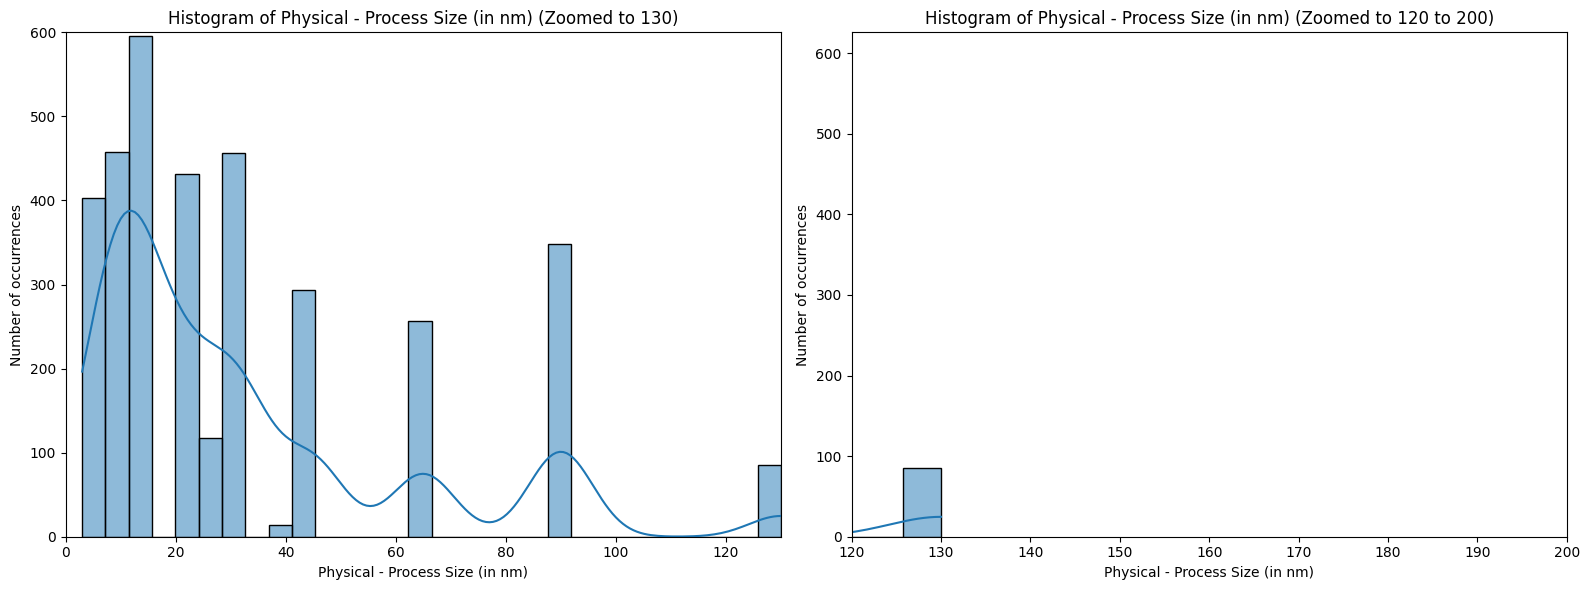

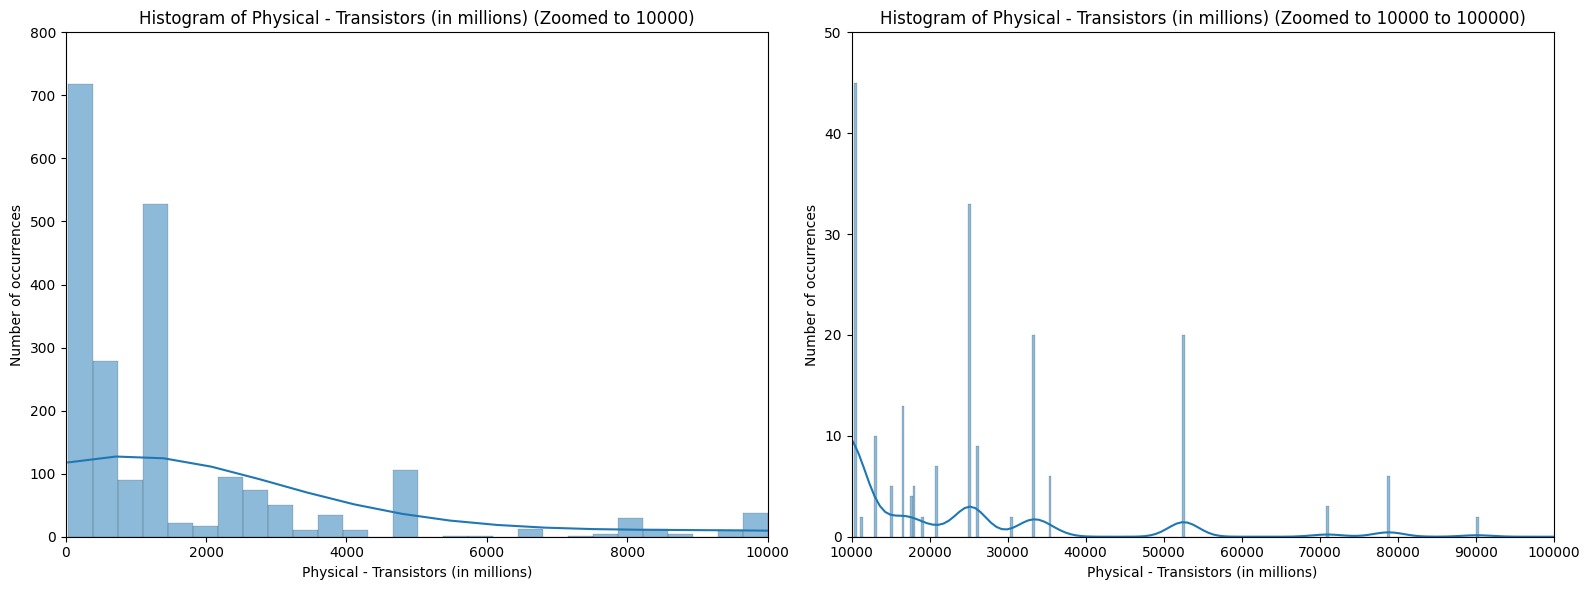

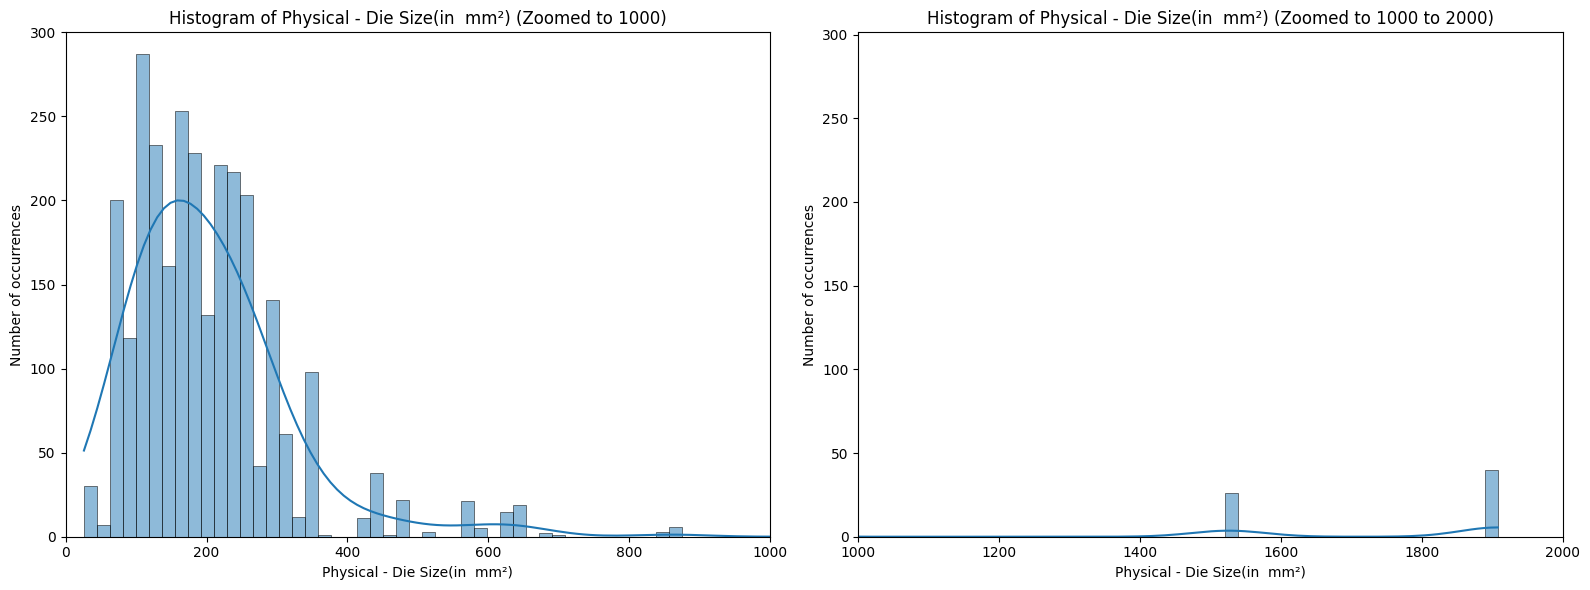

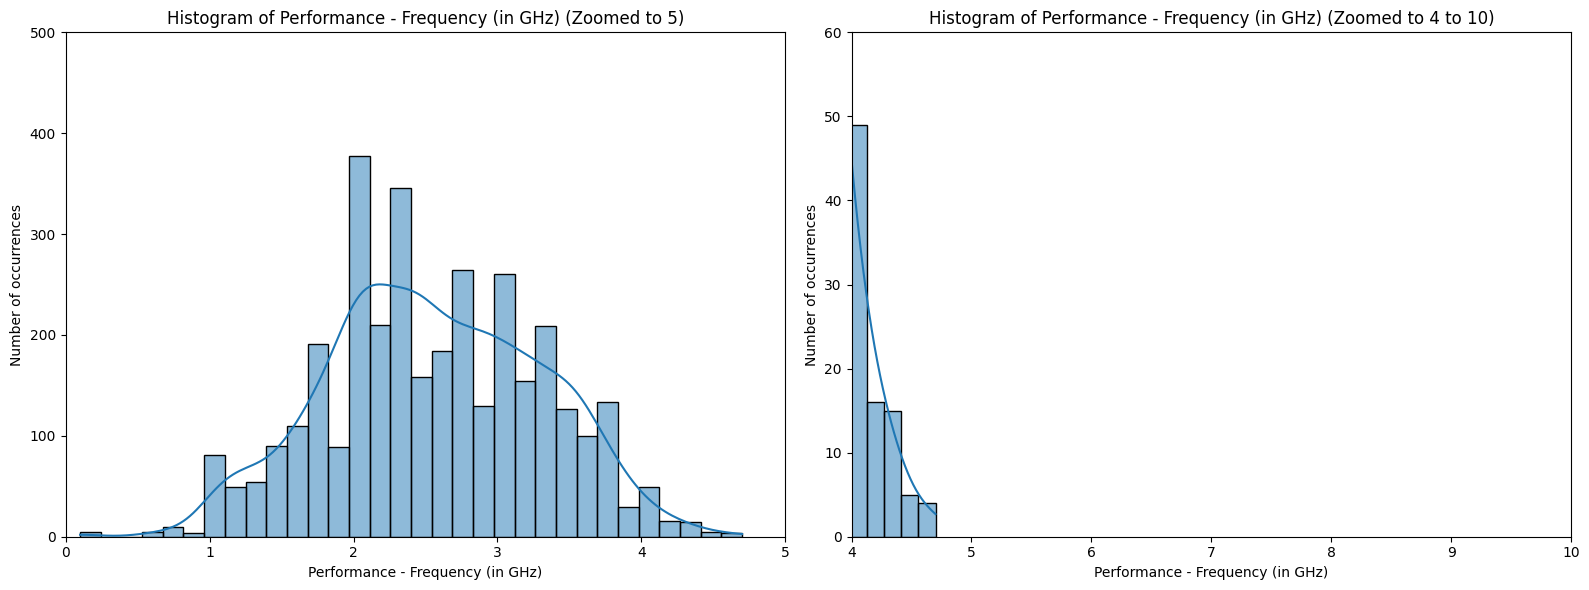

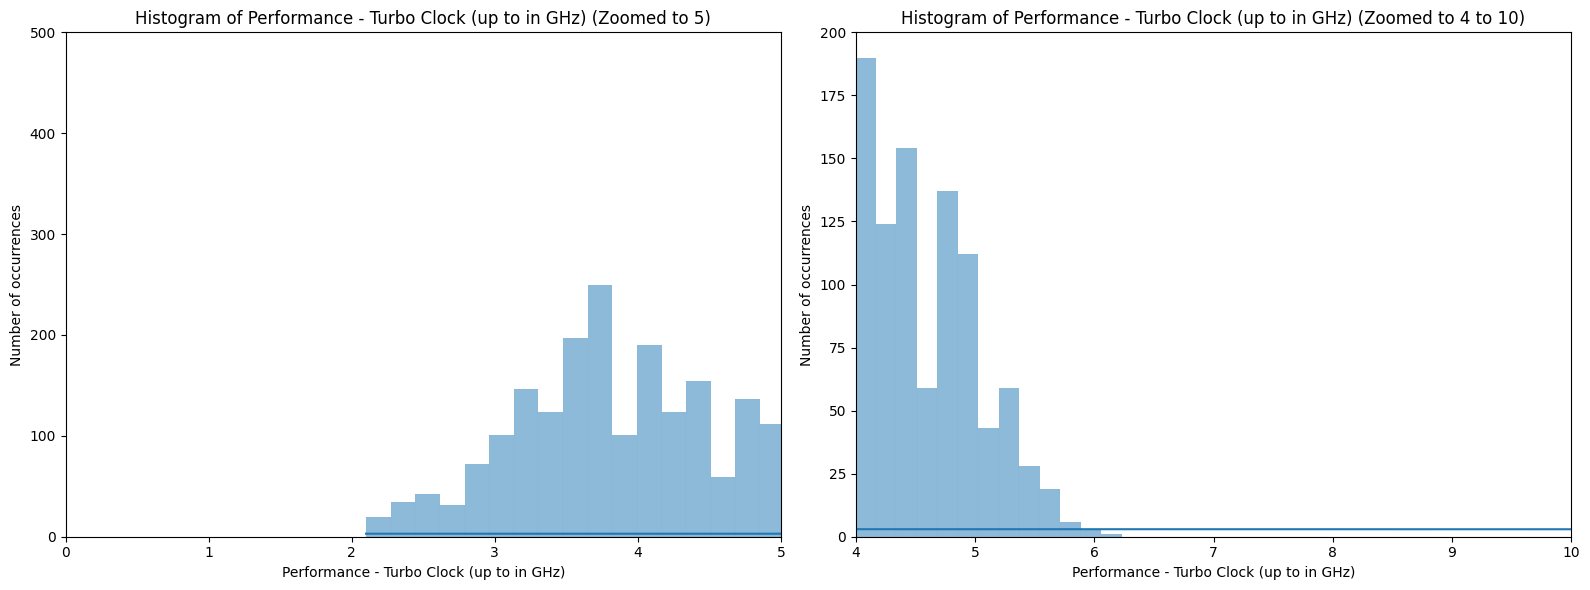

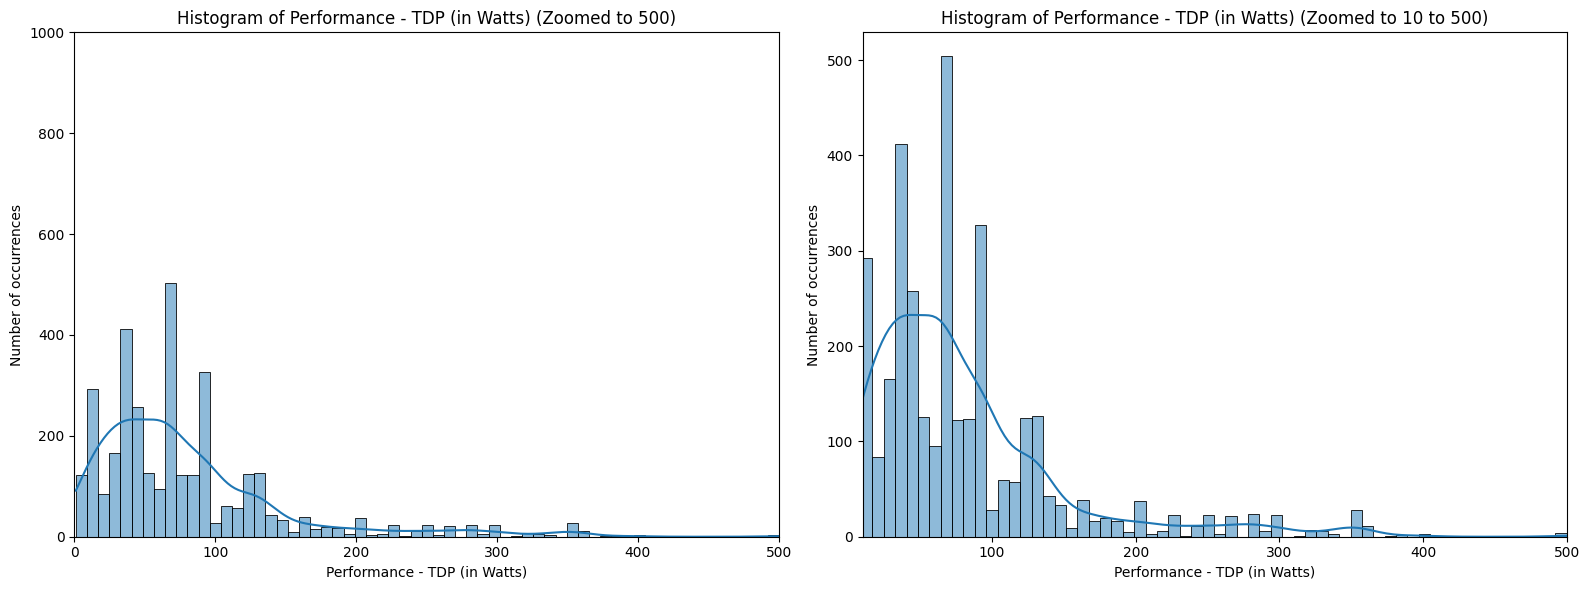

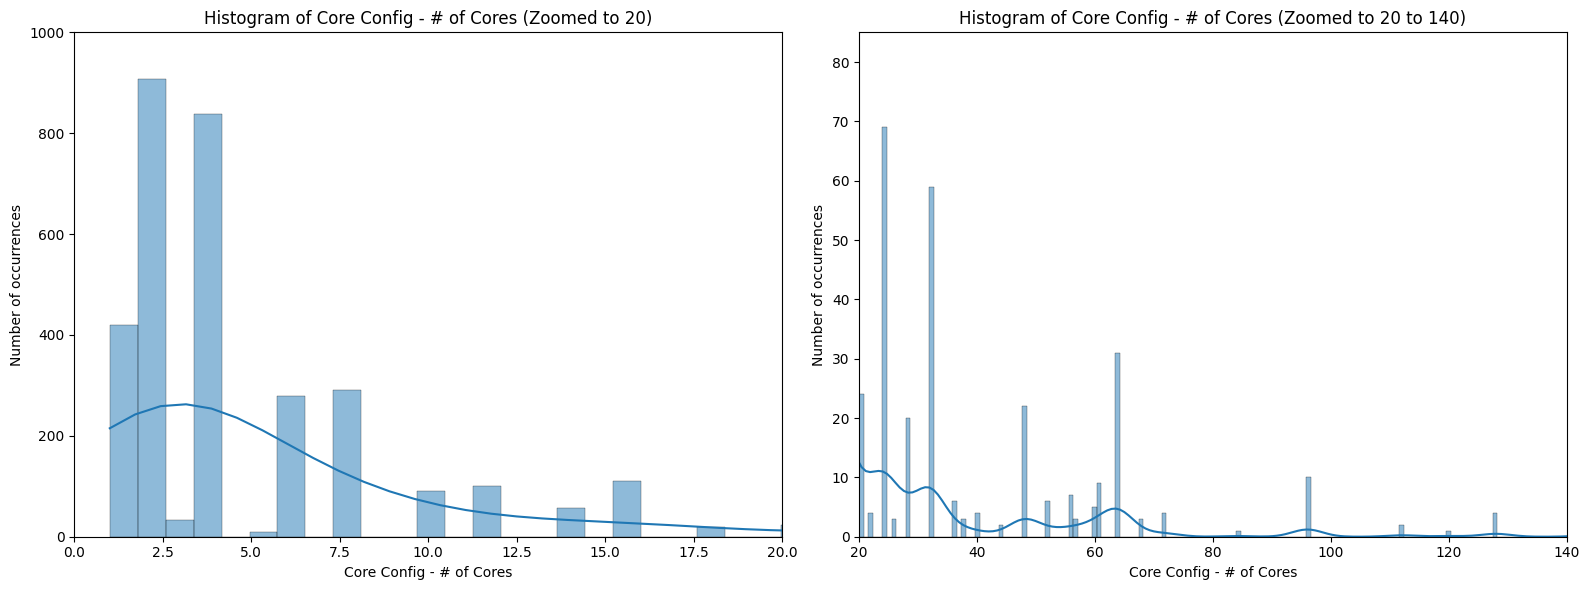

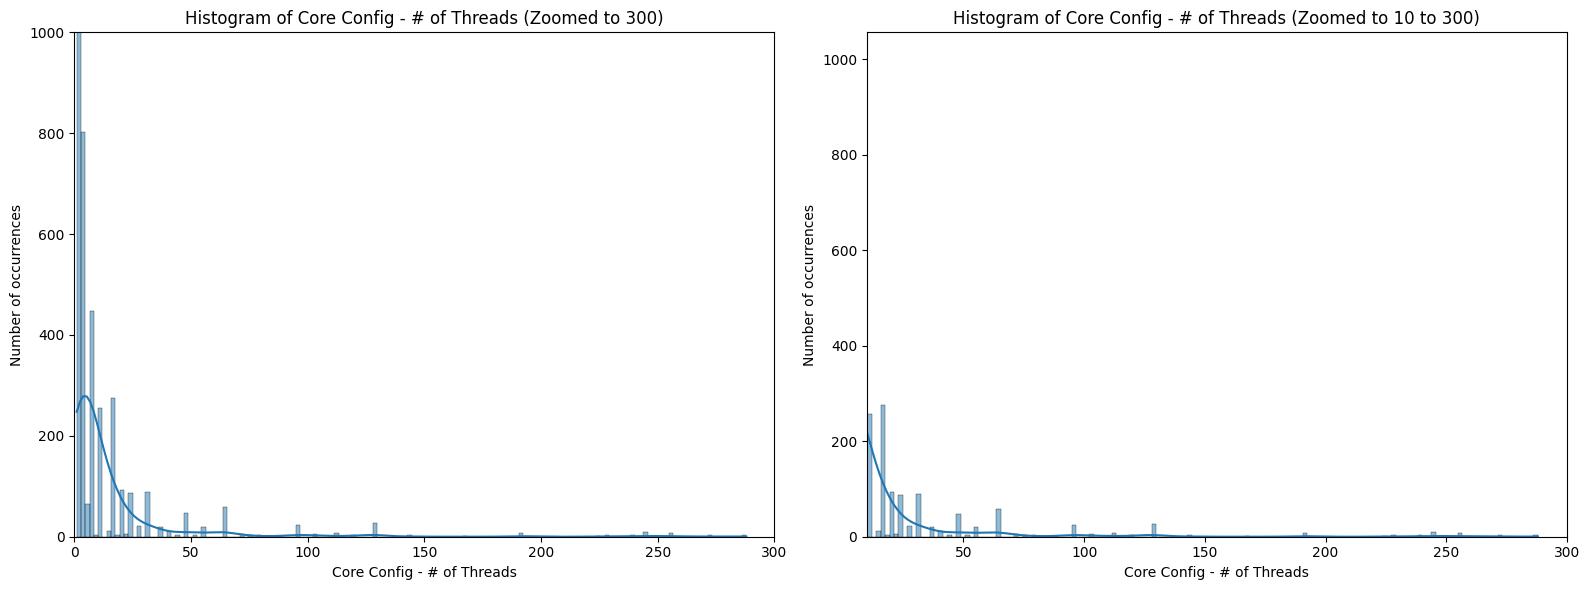

KeyError: 'Cache L1 Size'

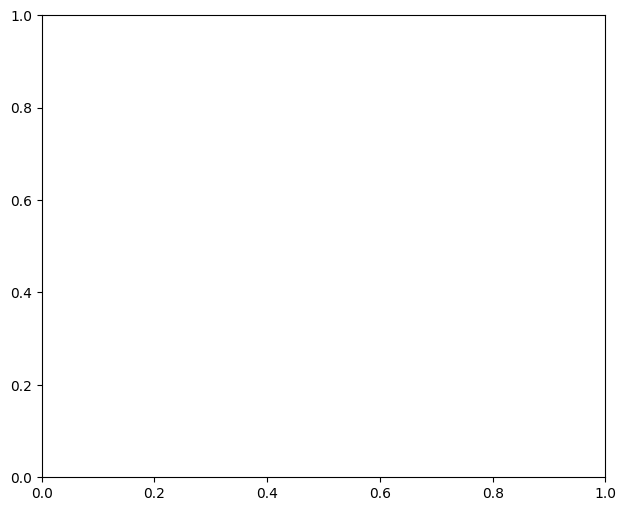

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CPU data
cpu_data = pd.read_excel('../src/cpu_data_cleaned.xlsx')


cpu_data.columns = cpu_data.columns.str.strip()
# List of CPU columns for histograms (numerical columns)
cpu_numerical_columns = [
    'Physical - Process Size (in nm)',
    'Physical - Transistors (in millions)',
    'Physical - Die Size(in  mm²)', 
    'Performance - Frequency (in GHz)', 
    'Performance - Turbo Clock (up to in GHz)', 
    'Performance - TDP (in Watts)', 
    'Core Config - # of Cores', 
    'Core Config - # of Threads', 
    'Cache L1 Size (in KB)', 
    'Cache L2 Size (in MB)', 
    'Cache L3 Size (in MB)'
]

# List of CPU categorical columns (add more as you find them)
cpu_categorical_columns = [
    'Architecture - Memory Bus',
    "Processor - Market",
    "Processor - Production Status",
]

# Function to convert non-numeric values to NaN
def convert_to_numeric(data, columns):
    for column in columns:
        if column in data.columns:
            data[column] = pd.to_numeric(data[column], errors='coerce')  # Convert to NaN where conversion fails

# Convert the numerical columns to numeric (handle non-numeric values)
convert_to_numeric(cpu_data, cpu_numerical_columns)

# Create histograms for numerical CPU columns
def plot_histograms(data, numerical_columns, xlim_max=None):
    # Calculate the number of rows needed, with 2 plots per row
    n_cols = 2
    n_rows = math.ceil(len(numerical_columns) / n_cols)
    
    # Create a figure for subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 6))
    axes = axes.flatten()  # Flatten the axes for easy iteration
    
    # Plot each numerical column in its respective subplot
    for i, column in enumerate(numerical_columns):
        if column in data.columns:
            sns.histplot(data[column].dropna(), kde=True, ax=axes[i])
            axes[i].set_title(f'Histogram of CPU {column}')
            axes[i].set_xlabel(column)
            axes[i].set_ylabel('Number of occurrences')
            # Apply xlim to ignore outliers if specified
            if xlim_max is not None:
                axes[i].set_xlim(0, xlim_max)
    
    # Hide any remaining empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    # Adjust layout to prevent overlap and add space between subplots
    plt.tight_layout()
    plt.subplots_adjust(wspace=0.4, hspace=0.3)  # Adjust space between plots

    plt.show()

def plot_histograms_with_two_limits(data, column, xlim_max1=None, xlim_max2=None, ylim_max1=None, ylim_max2=None, zoom_range=(10000, 50000)):
    # First plot with xlim_max1 and ylim_max1 for both subplots
    plt.figure(figsize=(16, 6))

    # Plot 1: with xlim_max1 and ylim_max1
    plt.subplot(1, 2, 1)
    sns.histplot(data[column].dropna(), kde=True)
    plt.title(f'Histogram of {column} (Zoomed to {xlim_max1})')
    plt.xlabel(column)
    plt.ylabel('Number of occurrences')
    if xlim_max1 is not None:
        plt.xlim(0, xlim_max1)
    if ylim_max1 is not None:
        plt.ylim(0, ylim_max1)

    # Plot 2: with xlim_max2 and ylim_max2, but narrower zoom_range
    plt.subplot(1, 2, 2)
    sns.histplot(data[column].dropna(), kde=True, binwidth=2000)
    plt.title(f'Histogram of {column} (Zoomed to {zoom_range[0]} to {zoom_range[1]})')
    plt.xlabel(column)
    plt.ylabel('Number of occurrences')
    plt.xlim(zoom_range[0], zoom_range[1])
    if ylim_max2 is not None:
        plt.ylim(0, ylim_max2)

    plt.tight_layout()
    plt.show()

# Create histograms with custom limits for each feature
def plot_histograms_with_custom_limits(data, columns_with_limits):
    # Iterate over each column and its custom limits
    for column, limits in columns_with_limits.items():
        xlim_max1, xlim_max2, ylim_max1, ylim_max2, zoom_range = limits
        
        # First plot with xlim_max1 and ylim_max1 for both subplots
        plt.figure(figsize=(16, 6))

        # Plot 1: with xlim_max1 and ylim_max1
        plt.subplot(1, 2, 1)
        sns.histplot(data[column].dropna(), kde=True)
        plt.title(f'Histogram of {column} (Zoomed to {xlim_max1})')
        plt.xlabel(column)
        plt.ylabel('Number of occurrences')
        if xlim_max1 is not None:
            plt.xlim(0, xlim_max1)
        if ylim_max1 is not None:
            plt.ylim(0, ylim_max1)

        # Plot 2: with xlim_max2 and ylim_max2, narrower zoom range, and no binwidth to avoid issues
        plt.subplot(1, 2, 2)
        sns.histplot(data[column].dropna(), kde=True)
        plt.title(f'Histogram of {column} (Zoomed to {zoom_range[0]} to {zoom_range[1]})')
        plt.xlabel(column)
        plt.ylabel('Number of occurrences')
        plt.xlim(zoom_range[0], zoom_range[1])
        if ylim_max2 is not None:
            plt.ylim(0, ylim_max2)

        plt.tight_layout()
        plt.show()



# Create bar plots for categorical CPU columns
def plot_categorical_barplots(data, categorical_columns):
    # Calculate the number of rows needed, with 2 plots per row
    n_cols = 2
    n_rows = math.ceil(len(categorical_columns) / n_cols)
    
    # Create a figure for subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 6))
    axes = axes.flatten()  # Flatten the axes for easy iteration
    
    # Plot each categorical column in its respective subplot
    for i, column in enumerate(categorical_columns):
        if column in data.columns:
            sns.countplot(y=data[column], order=data[column].value_counts().index, ax=axes[i])
            axes[i].set_title(f'Bar Plot of CPU {column}')
            axes[i].set_xlabel('Number of occurrences')
            axes[i].set_ylabel(column)
    
    # Hide any remaining empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    # Adjust layout to prevent overlap and add space between columns
    plt.tight_layout()
    plt.subplots_adjust(wspace=0.4, hspace=0.3)  # Increase space between plots

    plt.show()

# Call the functions to plot histograms and bar plots
# plot_histograms(cpu_data, cpu_numerical_columns)
# plot_histograms_with_two_limits(cpu_data, 
#                                 'Physical - Transistors (in millions)', 
#                                 xlim_max1=10000, 
#                                 xlim_max2=150000, 
#                                 ylim_max1=800, 
#                                 ylim_max2=50,
#                                 zoom_range=(10000, 100000))

columns_with_limits = {
    'Physical - Process Size (in nm)': (130, None, 600, None, (120, 200)),
    'Physical - Transistors (in millions)': (10000, 150000, 800, 50, (10000, 100000)),
    'Physical - Die Size(in  mm²)': (1000, None, 300, None, (1000, 2000)),
    'Performance - Frequency (in GHz)': (5, None, 500, 60, (4, 10)),
    'Performance - Turbo Clock (up to in GHz)': (5, None, 500, 200, (4, 10)),
    'Performance - TDP (in Watts)': (500, None, 1000, None, (10, 500)),
    'Core Config - # of Cores': (20, None, 1000, 85, (20, 140)),
    'Core Config - # of Threads': (300, None, 1000, None, (10, 300)),
    'Cache L1 Size (in KB)': (1000, None, 2000, None, (10, 800)),
    'Cache L2 Size (in MB)': (500, None, 1200, None, (10, 500)),
    'Cache L3 Size (in MB)': (1000, None, 500, None, (10, 1200)),
}

# Call the function to plot histograms with custom limits
plot_histograms_with_custom_limits(cpu_data, columns_with_limits)

plot_categorical_barplots(cpu_data, cpu_categorical_columns)



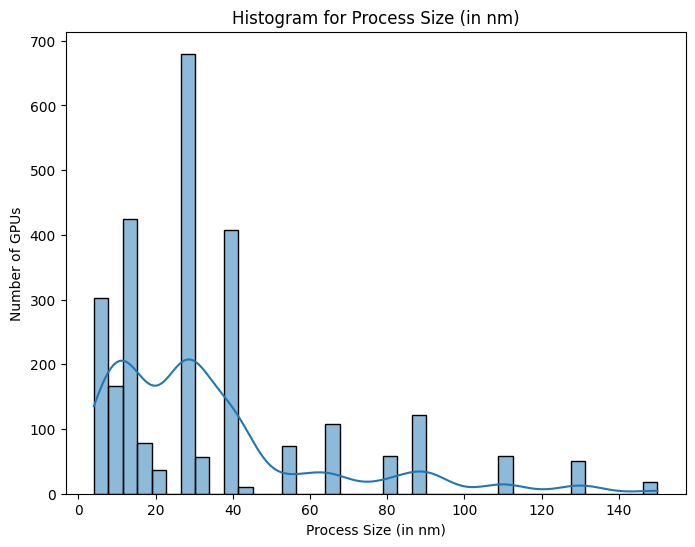

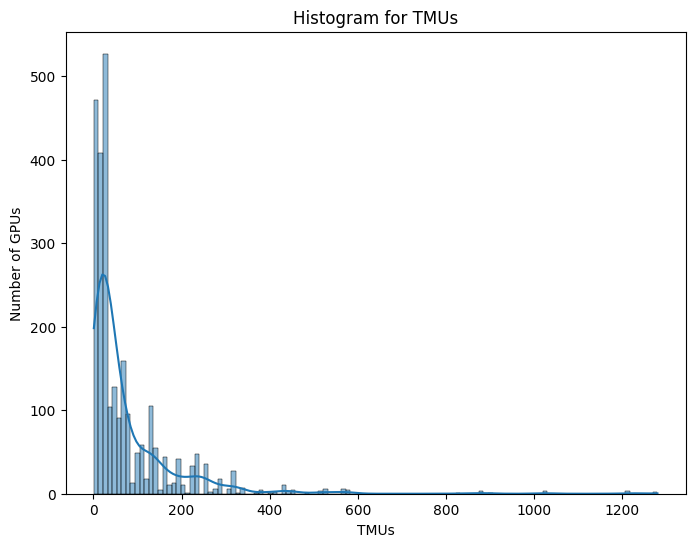

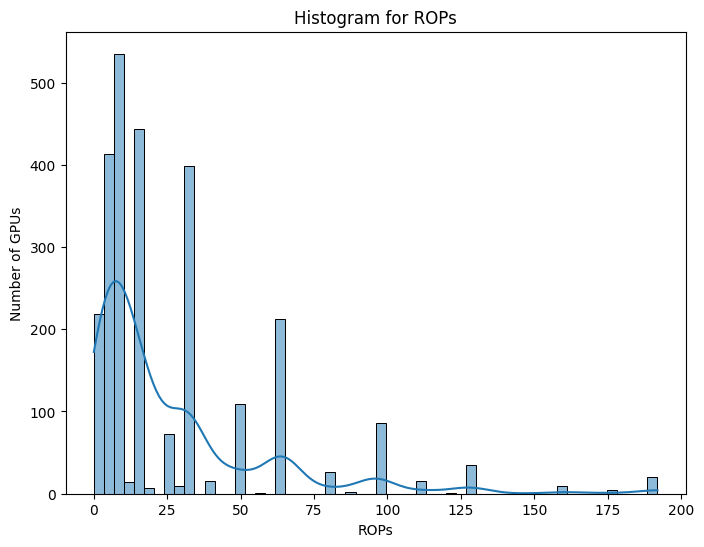

In [96]:
# # Load the GPU data
gpu_data = pd.read_excel('../src/gpu_data_cleaned.xlsx')

# List of GPU columns for plotting
gpu_columns = [
    "Process Size (in nm)", 
    "Transistors (in millions)", 
    "Density (in M / mm²)", 
    "Die Size (in mm²)", 
    "Production", 
    "Base Clock (in MHz)", 
    "Boost Clock (in MHz)", 
    "Memory Clock (in MHz)", 
    "Effective Speed (in Gbps)", 
    "Memory Size (in GB)", 
    "Memory Bus (in bit)", 
    "Bandwidth (in GB/s)", 
    "Shading Units", 
    "TMUs", 
    "ROPs", 
    "SM Count", 
    "Tensor Cores", 
    "RT Cores", 
    "L1 Cache (in KB)", 
    "L2 Cache (in MB)", 
    "Pixel Rate (in GPixel/s)", 
    "Texture Rate (in Gtexel/s)", 
    "FP16 (half, in TFLOPS)", 
    "FP32 (float, in TFLOPS)", 
    "FP64 (double, in TFLOPS)", 
    "TDP (in Watts)"
]

# Create histograms for each GPU column
for column in gpu_columns:
    if gpu_data[column].dtype in ['float64', 'int64']:  # Only plot numerical data
        plt.figure(figsize=(8, 6))
        sns.histplot(gpu_data[column].dropna(), kde=True)
        plt.title(f'Histogram for {column.strip()}')
        plt.xlabel(column.strip())
        plt.ylabel('Number of GPUs')
        plt.show()


# # Load the GPU data
# gpu_data = pd.read_excel('../src/gpu_data_cleaned.xlsx')

# # List of GPU columns for plotting against launch price
# gpu_columns = [
#     "Process Size (in nm)", 
#     "Transistors (in millions)", 
#     "Density (in M / mm²)", 
#     "Die Size (in mm²)", 
#     "Base Clock (in MHz)", 
#     "Boost Clock (in MHz)", 
#     "Memory Clock (in MHz)", 
#     "Effective Speed (in Gbps)", 
#     "Memory Size (in GB)", 
#     "Memory Bus (in bit)", 
#     "Bandwidth (in GB/s)", 
#     "Shading Units", 
#     "TMUs", 
#     "ROPs", 
#     "SM Count", 
#     "Tensor Cores", 
#     "RT Cores", 
#     "L1 Cache (in KB)", 
#     "L2 Cache (in MB)", 
#     "Pixel Rate (in GPixel/s)", 
#     "Texture Rate (in Gtexel/s)", 
#     "FP16 (half, in TFLOPS)", 
#     "FP32 (float, in TFLOPS)", 
#     "FP64 (double, in TFLOPS)", 
#     "TDP (in Watts)"
# ]

# # Ensure that 'GPU - Launch Price (in USD)' is numeric
# gpu_data['GPU - Launch Price (in USD)'] = pd.to_numeric(gpu_data['GPU - Launch Price (in USD)'], errors='coerce')

# # Create scatter plots for each GPU column against launch price
# for column in gpu_columns:
#     if gpu_data[column].dtype in ['float64', 'int64']:  # Only plot numerical data
#         plt.figure(figsize=(8, 6))
#         sns.scatterplot(x=gpu_data[column], y=gpu_data['GPU - Launch Price (in USD)'])
#         plt.title(f'Scatter plot of {column.strip()} vs Launch Price (USD)')
#         plt.xlabel(column.strip())
#         plt.ylabel('Launch Price (USD)')
#         plt.show()


<h4>CPU Launch Price and Inflation Adjusted Launch Price Over Time</h4>

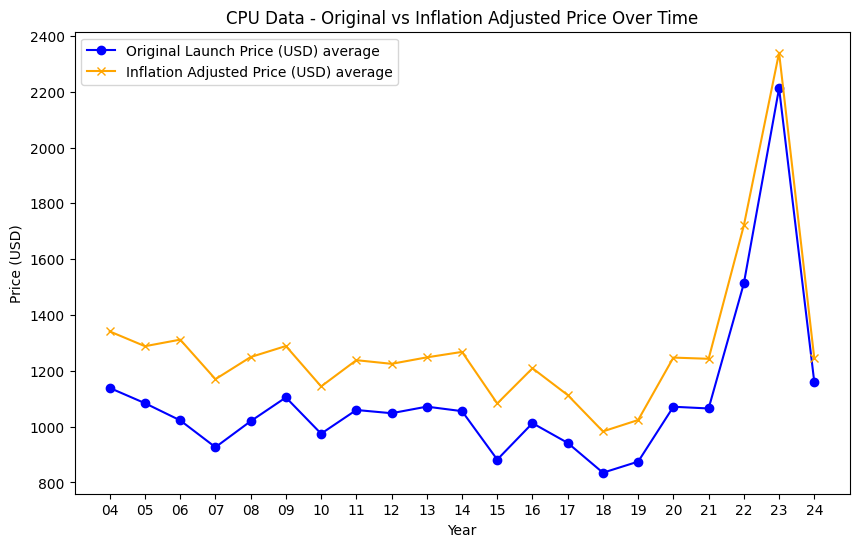

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

# Ensure 'Processor - Release Date' is in datetime format
cpu_data['Processor - Release Date'] = pd.to_datetime(cpu_data['Processor - Release Date'], errors='coerce')

# Convert 'Processor - Launch Price (in USD)' and 'Processor - Launch Price Inflation Adjusted for 2024 (in USD)' to numeric, forcing errors to NaN
cpu_data['Processor - Launch Price  (in USD)'] = pd.to_numeric(cpu_data['Processor - Launch Price  (in USD)'], errors='coerce')
cpu_data['Processor - Launch Price Inflation Adjusted for 2024 (in USD)'] = pd.to_numeric(cpu_data['Processor - Launch Price Inflation Adjusted for 2024 (in USD)'], errors='coerce')

# Fill NaN values with the mean of the column
cpu_data['Processor - Launch Price  (in USD)'] = cpu_data['Processor - Launch Price  (in USD)'].fillna(cpu_data['Processor - Launch Price  (in USD)'].mean())
cpu_data['Processor - Launch Price Inflation Adjusted for 2024 (in USD)'] = cpu_data['Processor - Launch Price Inflation Adjusted for 2024 (in USD)'].fillna(cpu_data['Processor - Launch Price Inflation Adjusted for 2024 (in USD)'].mean())

# Extract the year from the release date
cpu_data['Release Year'] = cpu_data['Processor - Release Date'].dt.year

# Group by the year and calculate the mean values for launch price and inflation-adjusted price
cpu_yearly_avg = cpu_data.groupby('Release Year').agg({
    'Processor - Launch Price  (in USD)': 'mean',
    'Processor - Launch Price Inflation Adjusted for 2024 (in USD)': 'mean'
}).reset_index()

# Reindex the dataframe to ensure we have values for all years between 2004 and 2024
cpu_yearly_avg = cpu_yearly_avg.set_index('Release Year').reindex(range(2004, 2025), fill_value=0).reset_index()

# Plot the averaged data with adjusted x-ticks
def plot_original_vs_inflation_adjusted_price(data):
    plt.figure(figsize=(10, 6))
    
    # Plot both the original launch price and inflation-adjusted price
    plt.plot(data['Release Year'], data['Processor - Launch Price  (in USD)'], label='Original Launch Price (USD) average', color='blue', marker='o')
    plt.plot(data['Release Year'], data['Processor - Launch Price Inflation Adjusted for 2024 (in USD)'], label='Inflation Adjusted Price (USD) average', color='orange', marker='x')
    
    plt.title('CPU Data - Original vs Inflation Adjusted Price Over Time')
    plt.xlabel('Year')
    plt.ylabel('Price (USD)')
    
    # Set x-ticks to only show the last two digits of the year
    years = np.arange(2004, 2025, 1)  # Full years from 2004 to 2024
    plt.xticks(years, [str(year)[-2:] for year in years])  # Extract the last two digits of each year

    plt.legend()
    plt.show()

# Call the function to plot
plot_original_vs_inflation_adjusted_price(cpu_yearly_avg)


<h4>GPU Price vs. Performance Over Time</h4>

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'GPU - Release Date' is in datetime format
gpu_data['GPU - Release Date'] = pd.to_datetime(gpu_data['GPU - Release Date'], errors='coerce')

# Convert 'GPU - Launch Price (in USD)' and 'GPU - Launch Price Inflation Adjusted for 2024 (in USD)' to numeric, forcing errors to NaN
gpu_data['GPU - Launch Price  (in USD)'] = pd.to_numeric(gpu_data['GPU - Launch Price  (in USD)'], errors='coerce')
gpu_data['GPU - Launch Price Inflation Adjusted for 2024 (in USD)'] = pd.to_numeric(gpu_data['GPU - Launch Price Inflation Adjusted for 2024 (in USD)'], errors='coerce')

# Fill NaN values with the mean of the column
gpu_data['GPU - Launch Price  (in USD)'] = gpu_data['GPU - Launch Price  (in USD)'].fillna(gpu_data['GPU - Launch Price  (in USD)'].mean())
gpu_data['GPU - Launch Price Inflation Adjusted for 2024 (in USD)'] = gpu_data['GPU - Launch Price Inflation Adjusted for 2024 (in USD)'].fillna(gpu_data['GPU - Launch Price Inflation Adjusted for 2024 (in USD)'].mean())

# Extract the year from the release date
gpu_data['Release Year'] = gpu_data['GPU - Release Date'].dt.year

# Group by the year and calculate the mean values for launch price and inflation-adjusted price
gpu_yearly_avg = gpu_data.groupby('Release Year').agg({
    'GPU - Launch Price  (in USD)': 'mean',
    'GPU - Launch Price Inflation Adjusted for 2024 (in USD)': 'mean'
}).reset_index()

# Reindex the dataframe to ensure we have values for all years between 2004 and 2024
gpu_yearly_avg = gpu_yearly_avg.set_index('Release Year').reindex(range(2004, 2025), fill_value=0).reset_index()

# Plot the averaged data with adjusted x-ticks
def plot_original_vs_inflation_adjusted_price_gpu(data):
    plt.figure(figsize=(10, 6))
    
    # Plot both the original launch price and inflation-adjusted price
    plt.plot(data['Release Year'], data['GPU - Launch Price  (in USD)'], label='Original Launch Price (USD) average', color='blue', marker='o')
    plt.plot(data['Release Year'], data['GPU - Launch Price Inflation Adjusted for 2024 (in USD)'], label='Inflation Adjusted Price (USD) average', color='orange', marker='x')
    
    plt.title('GPU Data - Original vs Inflation Adjusted Price Over Time')
    plt.xlabel('Year')
    plt.ylabel('Price (USD)')
    
    # Set x-ticks to only show the last two digits of the year
    years = np.arange(2004, 2025, 1)  # Full years from 2004 to 2024
    plt.xticks(years, [str(year)[-2:] for year in years])  # Extract the last two digits of each year

    plt.legend()
    plt.show()

# Call the function to plot
plot_original_vs_inflation_adjusted_price_gpu(gpu_yearly_avg)


KeyError: 'GPU - Release Date'

Generating histograms for CPU data:


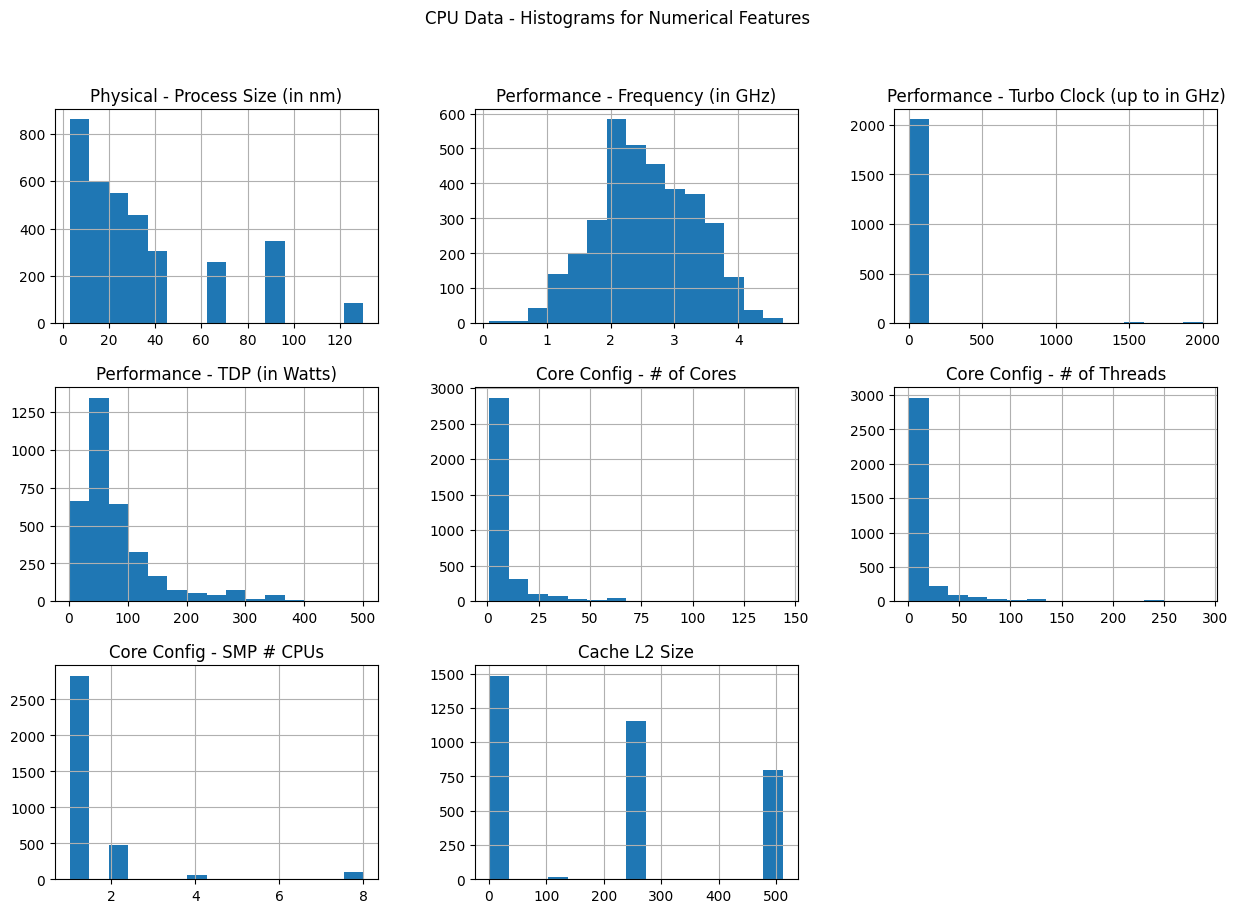

Generating histograms for GPU data:


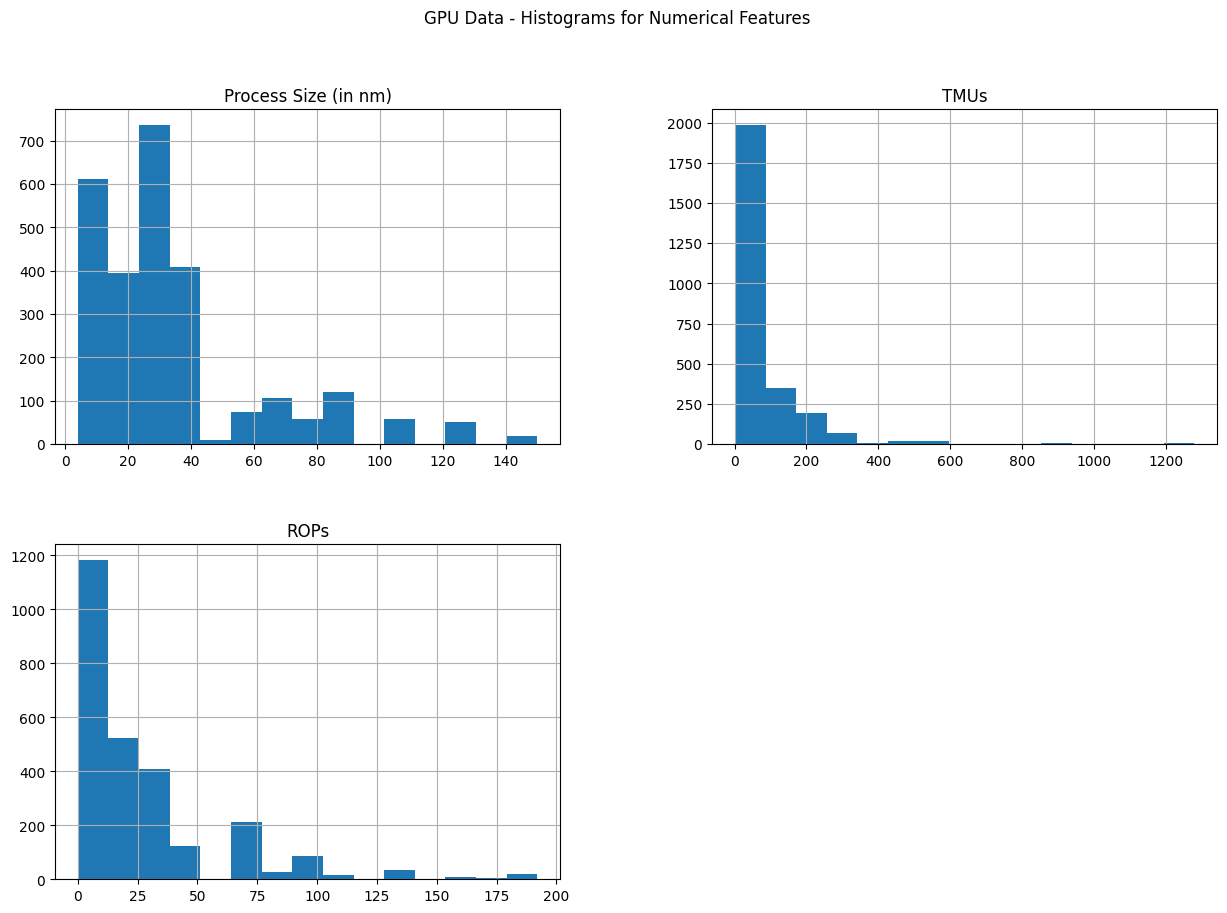

Generating correlation matrix for CPU data:


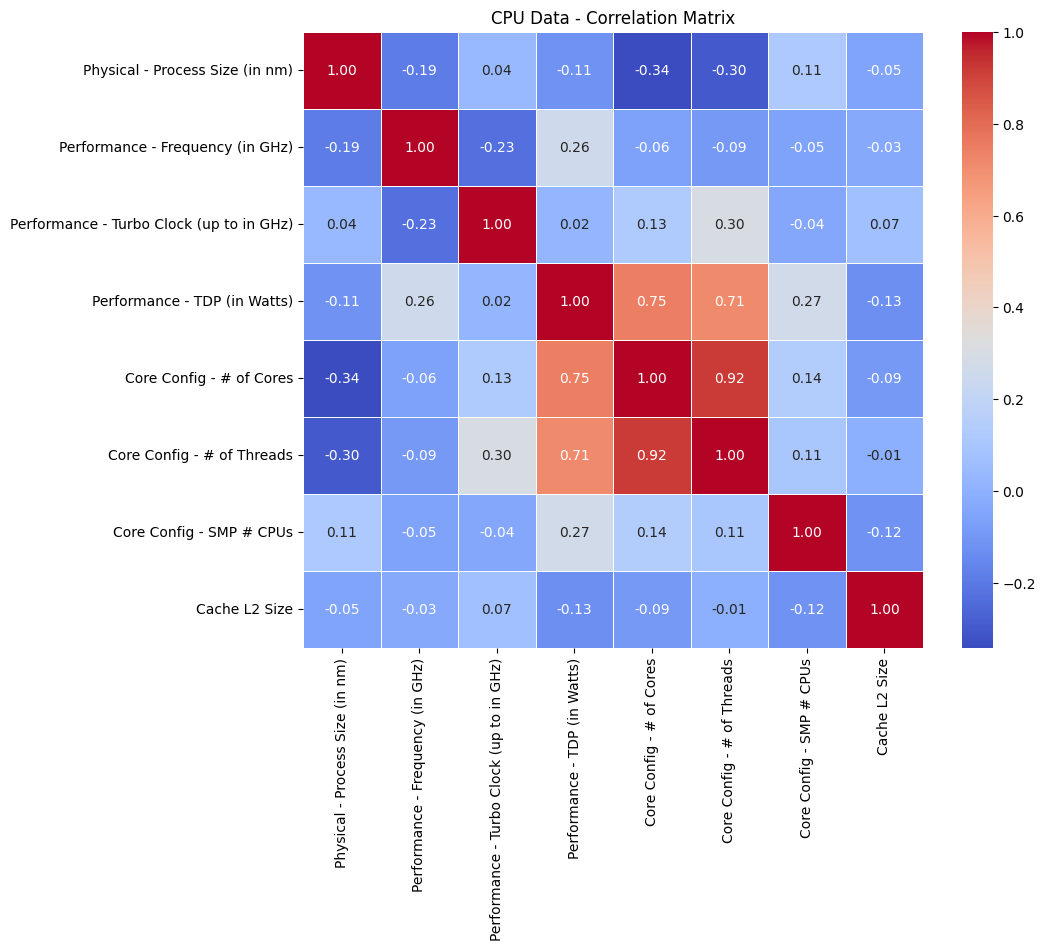

Generating correlation matrix for GPU data:


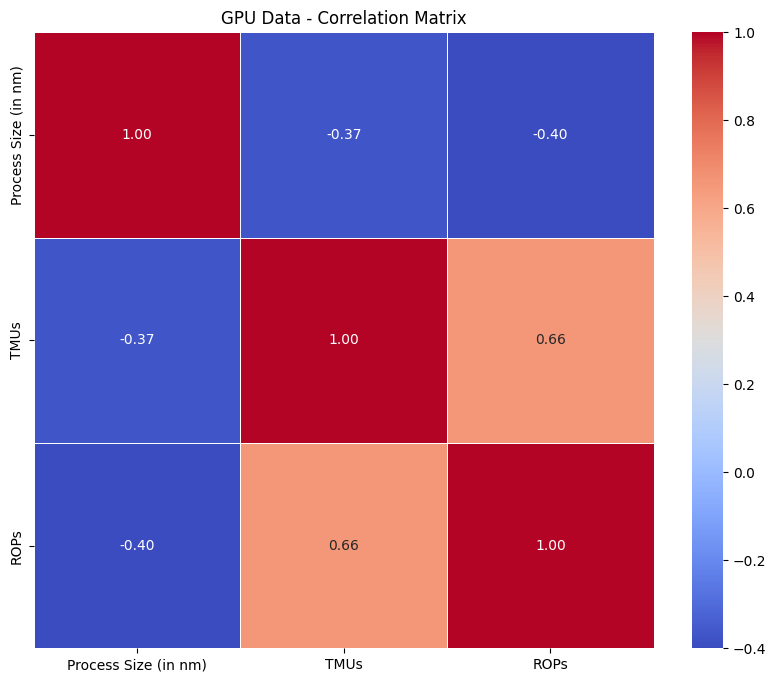

Generating feature importance for CPU data:


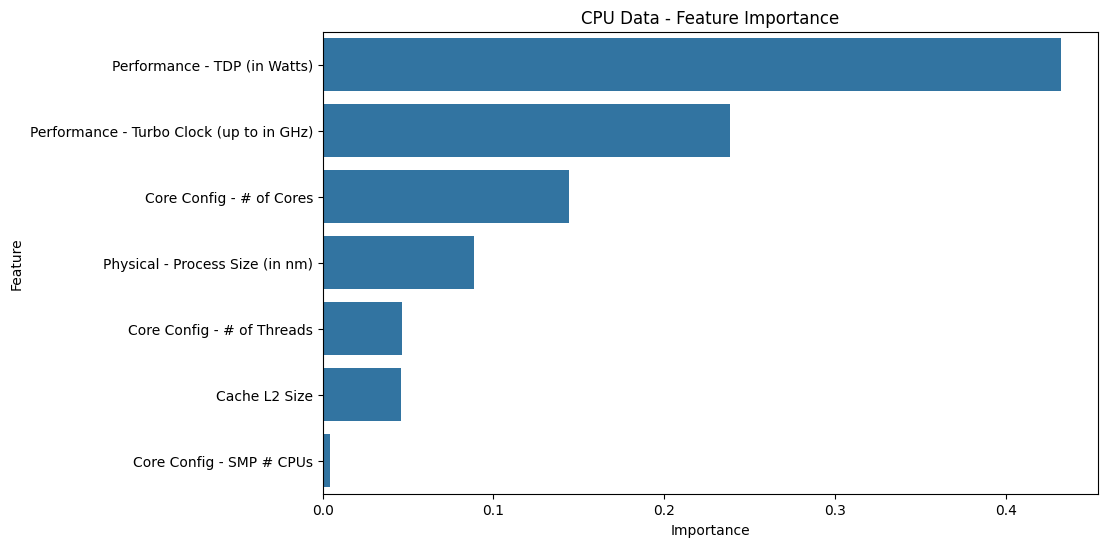

Generating feature importance for GPU data:


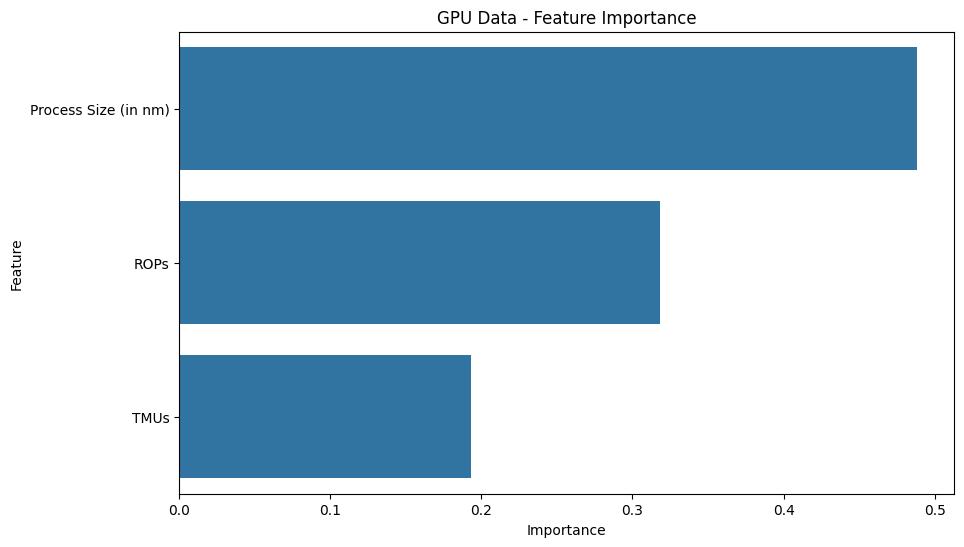

In [3]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.ensemble import RandomForestRegressor

# # Load the cleaned data
# cpu_data = pd.read_excel('../src/cpu_data_cleaned.xlsx')
# gpu_data = pd.read_excel('../src/gpu_data_cleaned.xlsx')

# # Set display options to show all columns
# pd.set_option('display.max_columns', None)

# # Histograms for numerical features
# def plot_histograms(data, dataset_name):
#     numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
#     data[numeric_columns].hist(bins=15, figsize=(15, 10))
#     plt.suptitle(f'{dataset_name} - Histograms for Numerical Features')
#     plt.show()

# # Correlation Matrix
# def plot_correlation_matrix(data, dataset_name):
#     numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
#     corr_matrix = data[numeric_columns].corr()
#     plt.figure(figsize=(10, 8))
#     sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
#     plt.title(f'{dataset_name} - Correlation Matrix')
#     plt.show()

# # Feature Importance using RandomForest
# def plot_feature_importance(data, target_column, dataset_name):
#     numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
#     X = data[numeric_columns].dropna()  # Handle NaNs in the dataset
#     y = X.pop(target_column)  # Target column for feature importance

#     model = RandomForestRegressor(n_estimators=100, random_state=0)
#     model.fit(X, y)

#     importances = model.feature_importances_
#     features = X.columns
#     feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
#     feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

#     plt.figure(figsize=(10, 6))
#     sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
#     plt.title(f'{dataset_name} - Feature Importance')
#     plt.show()

# # Apply the functions to CPU and GPU data
# print("Generating histograms for CPU data:")
# plot_histograms(cpu_data, "CPU Data")

# print("Generating histograms for GPU data:")
# plot_histograms(gpu_data, "GPU Data")

# print("Generating correlation matrix for CPU data:")
# plot_correlation_matrix(cpu_data, "CPU Data")

# print("Generating correlation matrix for GPU data:")
# plot_correlation_matrix(gpu_data, "GPU Data")

# # Assuming 'Performance - Frequency' is the target feature for CPU and GPU performance
# print("Generating feature importance for CPU data:")
# plot_feature_importance(cpu_data, target_column='Performance - Frequency (in GHz)', dataset_name="CPU Data")

# print("Generating feature importance for GPU data:")
# # Replace 'Not Provided' with NaN, then fill with the median value
# gpu_data['Base Clock (in MHz)'] = pd.to_numeric(gpu_data['Base Clock (in MHz)'], errors='coerce')

# # Calculate the median value
# median_value = gpu_data['Base Clock (in MHz)'].median()

# # Use a more explicit method to avoid the warning
# gpu_data.loc[:, 'Base Clock (in MHz)'] = gpu_data['Base Clock (in MHz)'].fillna(median_value)

# plot_feature_importance(gpu_data, target_column='Base Clock (in MHz)', dataset_name="GPU Data")


## Feature Engineering

## Model Selection

## Model Evaluation

## Prediction & Results

## Conclusion

## References